#SVM linéaires

Ce TP est consacré à la méthode SVM linéaire. Le principe est de maximisée la marge pour séparer des classes.
Dans Scikit-learn, les SVM sont implémentées dans le module `sklearn.svm`. Dans cette partie nous allons nous intéresser à la version linéaire (Scikit-learn utilise les bibliothèques libLinear et libSVM). Nous allons utiliser le jeu de données Iris. Pour l'affichage des résultats, on utilisera seulement les premiers deux attributs (longueur et largeur des sépales).


## Jeu de données Iris



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Chargement des données
#A compléter
iris = datasets.load_iris()

Pour commencer, nous ne conservons que les deux premiers attributs du jeu de données. On partage la base d'entrainement et la base de test en deux parties égales.

In [27]:
#A compléter
#Prendre comme données les deux premiers attributs : la longueur et la largeur des sépales
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Nous pouvons maintenant entraîner une machine à vecteur de support linéaire en utilisant le module `LinearSVC`




In [28]:
#A compléter
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

Calculez le score d’échantillons bien classifiés sur le jeu de données de test.

In [29]:
lin_svc.score(X_test, y_test)

0.7066666666666667

Visualisons maintenant la surface de décision apprise par notre modèle :

Text(0.5, 1.0, 'LinearSVC')

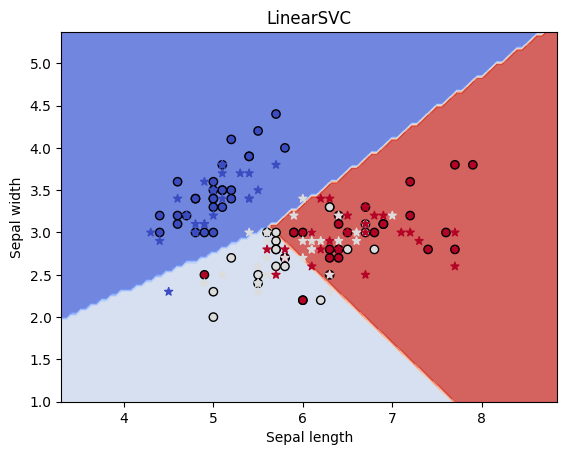

In [30]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

## <font color='violet'>Question</font>

Testez differentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?

## <font color='violet'>Question</font>

D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?

## Correction

Le classifieur produit des frontières de décision linéaire. Cela suffit à séparer une des trois classes des deux autres, toutefois en ne considérant que les deux premiers attributs, les deux autres classes ne semblent pas linéairement séparables.

Il faudrait soit utiliser un modèle non linéaire, soit ajouter des attributs supplémentaires en espérant qu’ils permettront de séparer linéairement les deux classes restantes.

Les modèles linéaires `LinearSVC()` et `SVC(kernel='linear')` produisent des résultats légèrement différents à cause du fait qu’ils optimisent des fonctions de coût différentes mais aussi à cause du fait qu’ils gèrent les problèmes multi-classe de manière différente (linearSVC utilise *One-vs-All* et SVC utilise *One-vs-One*).

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


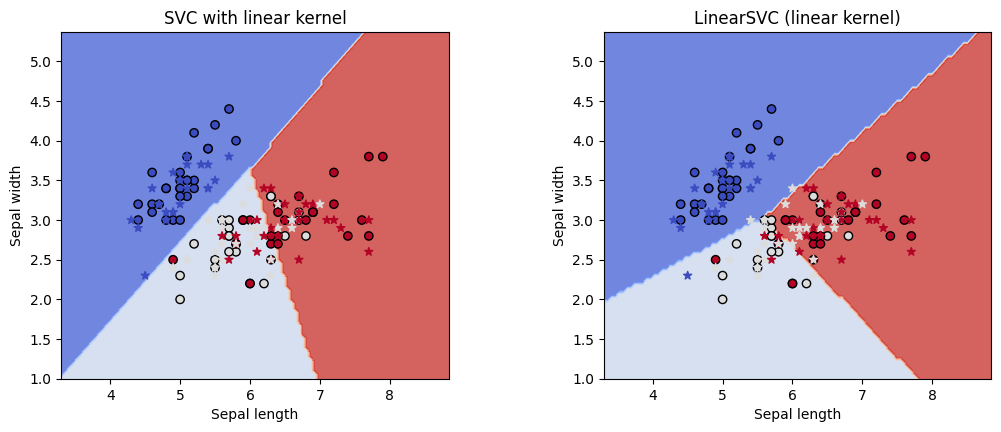

In [31]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

Pour l’instant, nous n’avons exploité que deux variables explicatives. Néanmoins, l’intérêt des machines à vecteur de support linéaires est qu’il est souvent plus facile de trouver des hyperplans séparateurs dans des espaces de grande dimension.

## <font color='violet'>Question</font>

Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Iris. Le score de classification en test a-t-il augmenté ? Pourquoi ?

In [32]:
#A compléter
X, y = iris.data, iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9733333333333334

Le score augmente (de 0,75 à 0,9 en général) car les deux attributs que nous avons ajouté permettent de mieux séparer les trois classes.

## Jeu de données Digits

Le jeu de données Digits est une collection d’images de chiffres manuscrits.
Utilisez les données Digits pour construire un classifieur LinearSVC et évaluez-le.

On commence par :
* charger le dataset
* Partager les données entre les données de training et les données d'entrainement

In [33]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV
digit = datasets.load_digits()
X,y = digit.data, digit.target
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.7)

On fait l'entrainement et on calcule le score

In [34]:
C = 1
svmLinear = svm.LinearSVC(C=C)
svmLinear.fit(X_train,y_train)
svmLinear.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9205087440381559

Optimisez les paramètres en utilisant `GridSearchCV`

In [35]:
parameters = {'kernel':('linear', 'rbf'),'C':[1,10]}
svmLinear = svm.SVC()
clf = GridSearchCV(svmLinear, parameters)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9833068362480127